Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

Reading the training and testing sets which are in the comma separated value(CSV) format

In [2]:
#Reading the training and the test sets using pandas read_csv method
train = pd.read_csv("D:/Predicting_house_prices/train.csv")
test = pd.read_csv("D:/Predicting_house_prices/test.csv")

Setting the option to display all the columns in the dataframe and displaying the first five rows of the training dataframe

In [3]:
# Using the set_option function and the max_columns to display all the columns of the dataframe
pd.set_option('display.max_columns',None)

# Displaying the first five rows of the dataframe
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Checking the data types of all the columns in the dataframe and grouping them by the datatypes
train.columns.to_series().groupby(train.dtypes).groups

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 

# Analysing the target (Sale Price)

Let's analyse the range of the sale price of houses in the dataset and have a look at how the prices of how are distributed. For optimal visualization and also since the range or the difference in the maximum and the minimum price is too large we will normalizing the SalePrice column before plotting it.

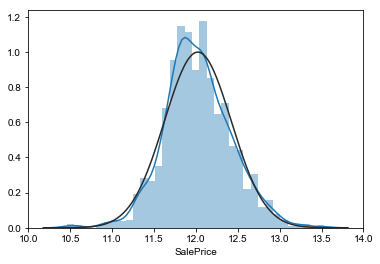

In [5]:
# Normalizing the SalePrice column by means of the log function
train['SalePrice'] = np.log(train['SalePrice'])

#Plotting a distribution plot/ histogram using the seaborn library imported earlier
sns.distplot(train['SalePrice'], fit = norm)
sns.set(rc = {'figure.figsize':(12,6)})

The distribution of house prices from the plot looks quite normally distributed. It would be interesting to see what could be the potential features that would be driving the prices.

# Dealing with missing data

Now,in order to deal with missing data or rather the features in the dataset with a large number of their entries missing 

In [6]:
# Finding columns with the most missing values using the isnull method and sorting them in descending order(i.e. max to min)
#displaying the 20 columns with the most no. of missing values.
missing = train.isnull().sum().sort_values(ascending = False).head(20)
missing 

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

Let's drop the columns with most missing values(>100).Intuitively, this wouldn't lead to loss of important data since none of the features of the columns to be dropped seem to put a significant impact on the Sale Price of houses. We will be doing this with both, the training set and the testing set.

In [7]:
# Dropping the columns with more than 100 values missing from the training set
train.drop(columns = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'], inplace = True)

In [8]:
# Dropping the columns with more than 100 values missing from the testing set 
test.drop(columns = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'], inplace = True)

Now, since we have dropped some unwanted and features with large number of missing values. We will nee to impute values in the remaining features with less no. of missing values. We will be using different imputational strategies according to respective features.

Let's concatenate the training and testing set so that we not have to make imputations individually. Also this would help in reducing some extra work in future analysis.

In [9]:
#Conactenating the train and test set using pandas concat method
data = pd.concat((train, test), sort = False).reset_index(drop = True)

In [10]:
#Imputing missing values in the remaining features
for col in ['GarageCond', 'GarageType','GarageFinish','GarageQual','BsmtExposure','BsmtFinType1',
            'BsmtFinType2','BsmtCond','BsmtQual','MasVnrType']:
    
    data[col] = data[col].fillna('None')

#Imputing with 0
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

#Imputing the missing  values with mode of the column
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

Now, after dropping and imputing features we need to find how strongly are they correlated with our target i.e The Sale Price of houses.To do this, the best tool that could come handy and incorporate all of the variables/features at once is the heatmap.

# Feature Engineering (Correlations)

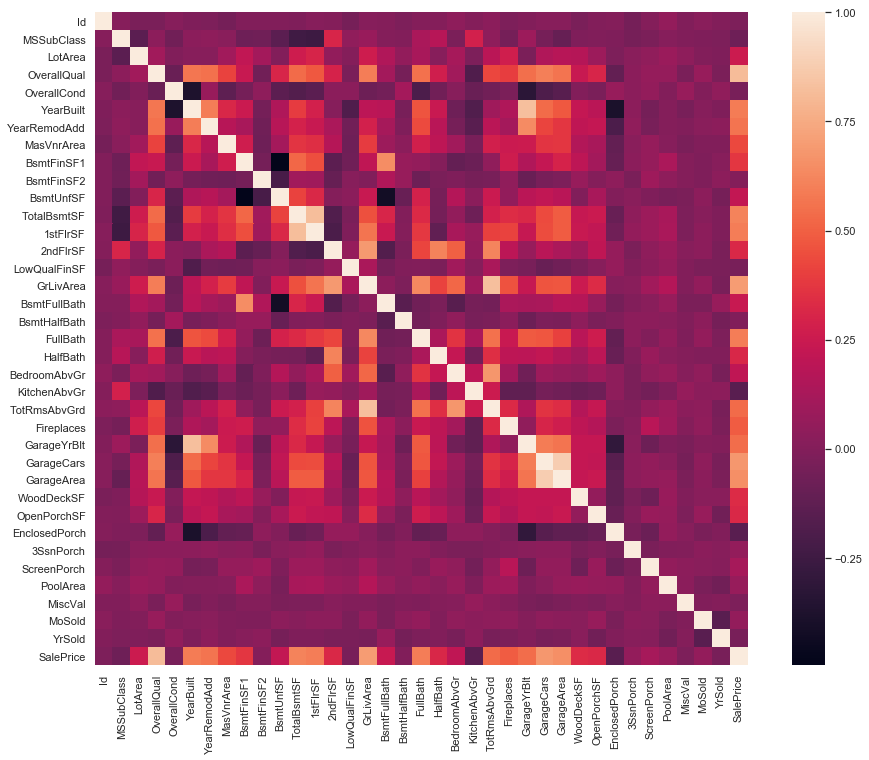

In [11]:
#Applying the correlation function on the train set
corr_map = train.corr()

#Using the matplotlib and seaborn library to plot the correlation in the form of a heatmap
f, ax = plt.subplots(figsize = (16,12))
sns.heatmap(corr_map, square = True )

The following features seem to have a high correlation from the heatmap:
OverallQual,
GarageCars,
GarageArea,
GrLivArea,
TotalBsmtSF,
YearBuilt,
FullBath. Now, let's try to find the correlation of these seemingly important features with the Sale Price one by one and normalizing some of the features if rquiredsince we have already normalized the Sale Price by means of the log function earlier.

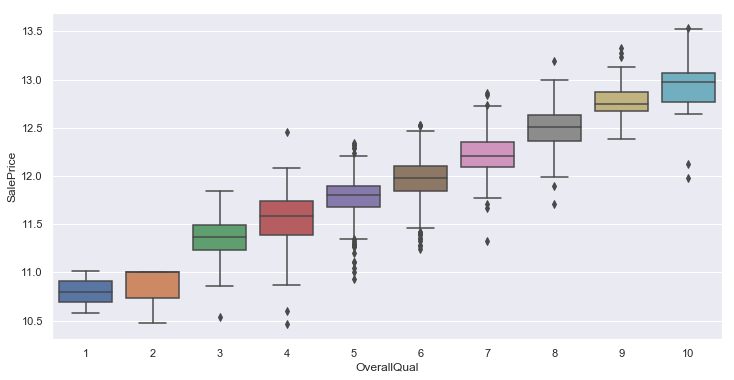

In [12]:
f1 = 'OverallQual'
#Concatenating the 'OverallQual' and 'SalePrice' columns
corr_1 = pd.concat([train['SalePrice'], train[f1]], axis = 1)
f, ax = plt.subplots(figsize = (12,6))
#Building a box plot on the concatenated columns
figure = sns.boxplot(x = f1, y = 'SalePrice', data = corr_1)

The minimum, median and maximum SalePrice tend to increment with respect to increments in the OverallQual (although with some outliers) but still they seem to be highly correlated. 
Now, let's try to find a correlation between GrLivArea and the Sales Price. This time let's do it by building a subdataframe.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


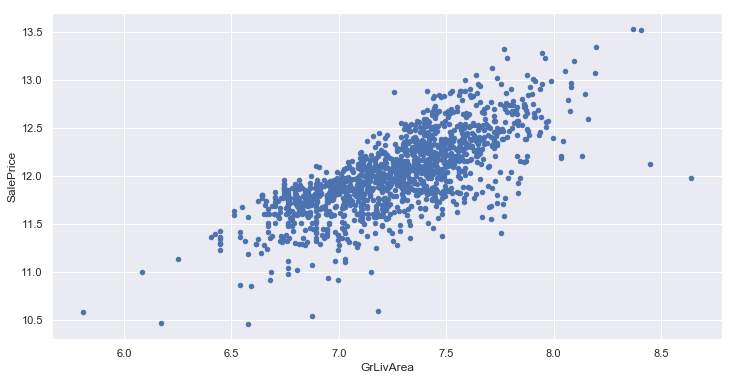

In [13]:
#Normalizing the GrLivArea column for better results and more clear visualiztions
train['GrLivArea'] = np.log(train['GrLivArea'])

#Building the dataframe and visualizing the same in the form of a scatter plot
f2 = pd.DataFrame({'GrLivArea':train['GrLivArea'],
                   'SalePrice':train['SalePrice']}).plot(kind = 'scatter', x = 'GrLivArea', y = 'SalePrice')

The scatter plot too indicates that GrLivArea and SalePrice are quite correlated as was visualized from the heatmap as well.
Now, let's try and find how deeply is the SalePrice related to the year of building of the house using a box plot.

Dealing with outliers as addressed by the author in the documentation

In [14]:
# Removing outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

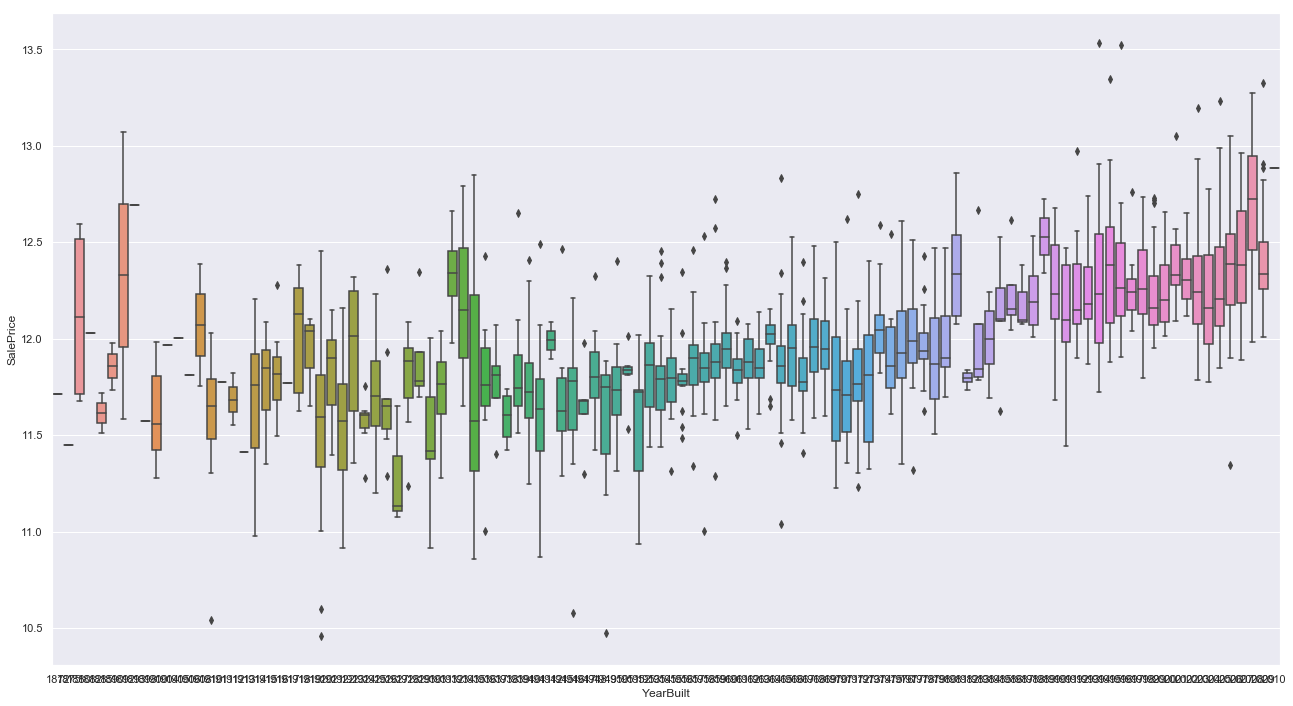

In [15]:
f3 = 'YearBuilt'
#Concatenating the 'YearBuilt' and 'SalePrice' columns
corr_3 = pd.concat([train['SalePrice'], train[f3]], axis = 1)
f, ax = plt.subplots(figsize = (22,12))
#Building a box plot on the concatenated columns
figure3 = sns.boxplot(x = f3, y = 'SalePrice', data = corr_3)

The box plot indicates a slight upward trend in the median sale prices of houses and so the comparatively newer ones tend to be expensive. But, at the same time quite old houses also tend to be of high ticket value. 
No sure conclusion can be made regarding the correlation between the two features and also the comparative increase in prices could also partly be driven by continuous appreciation in the housing market as well as factors like inflation would also drive the sale price. We aren't quite aware whether the prices in the data are adjusted to these factors or not. So, no definite conclusion can be made from this boxplot.

Now, let's find the correlation between the GarageArea and SalePrice of the houses by means of building a pandas dataframe and than building a scatter plot out of it.

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


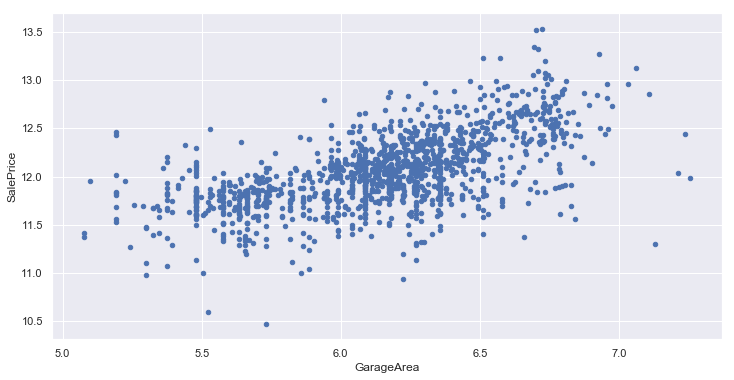

In [16]:
#Normalizing the GarageArea column for better results and more clear visualiztions
train['GarageArea'] = np.log(train['GarageArea'])
#Building the dataframe and visualizing the same in the form of a scatter plot
f4 = pd.DataFrame({'GarageArea':train['GarageArea'],
                   'SalePrice':train['SalePrice']}).plot(kind = 'scatter', x = 'GarageArea', y = 'SalePrice')

The scatter plot shows kind of a linear relationship and so the correation of sales price with the Garage area seems to be profound and more garage area does seem to be leading to higher sales prices in general except a few outliers.


Now, let's look at a scatter plot that indicates how do TotalBsmtSF and SalePrice vary with each other

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


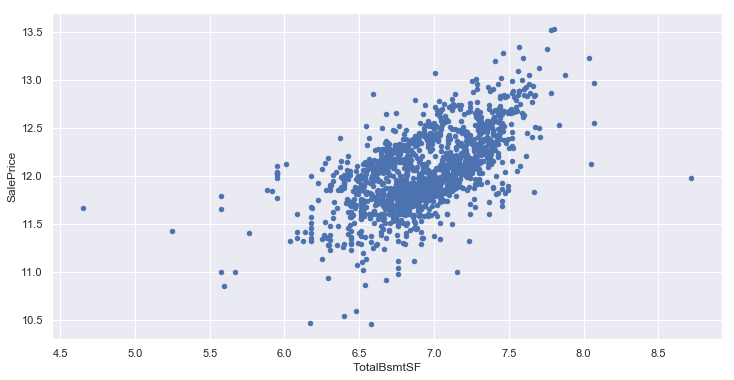

In [17]:
#Normalizing the TotalBsmtSF column for better results and more clear visualiztions
train['TotalBsmtSF'] = np.log(train['TotalBsmtSF'])
#Building the dataframe and visualizing the same in the form of a scatter plot
f4 = pd.DataFrame({'TotalBsmtSF':train['TotalBsmtSF'],
                   'SalePrice':train['SalePrice']}).plot(kind = 'scatter', x = 'TotalBsmtSF', y = 'SalePrice')

The TotalBsmtSF feature too shows some positive correlation with the Sale Price

Both, the heatmap and the individual plots show that the above observed features do possess a strong correlation with the Sale Price.

Converting numerical variables/features that are actually categorical 

In [18]:
#MSSubClass(the building class) to a categorical variable
data['MSSubClass'] = data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
data['OverallCond'] = data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

# Label Encoding

 Checking the data types of all the columns in the dataframe and grouping them by the datatypes. We need to do this again since from the previous time we chcked all of our data types we have dropped some features.

In [19]:
data.select_dtypes(include = ['object']).head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,2,2008,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,5,2007,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,9,2008,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,2,2006,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,12,2008,WD,Normal


Processing non-numerical features using Label Encoder

In [20]:
from sklearn.preprocessing import LabelEncoder
col = ('MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
       'Condition1','Condition2','BldgType','HouseStyle','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
       'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
       'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual',
       'GarageCond','PavedDrive','MoSold','YrSold','SaleType','SaleCondition')

for c in col:
    le = LabelEncoder()
    le.fit(list(data[c].values)) 
    data[c] = le.transform(list(data[c].values))    

# Finding other skewed features 

Earlier we had normalized the target variable and and some other features using the log function in order to get rid of skewing of our correlation models and plots. But in order to ready the data for training we will need to look for all the features that would affect our model and try and normalize them

Finding the most skewed numerical features

In [21]:
num_feat = data.dtypes[data.dtypes != "object"].index

# Checking the skew of all numerical features
skewed_feats = data[num_feat].skew(axis = 0, skipna = True).sort_values(ascending = False)
skewed_feats.head(15)

Utilities        33.990952
MiscVal          21.958480
PoolArea         16.907017
LotArea          12.829025
LowQualFinSF     12.094977
Heating          12.084999
Condition2       12.066294
3SsnPorch        11.381914
RoofMatl          8.712245
LandSlope         4.977715
KitchenAbvGr      4.304467
BsmtFinSF2        4.147456
EnclosedPorch     4.005950
ScreenPorch       3.948723
BsmtHalfBath      3.932018
dtype: float64

In [22]:
skewed_feats = skewed_feats[abs(skewed_feats) > 0.75]
from scipy.special import boxcox1p
skewed_features = skewed_feats.index
lam = 0.15
for feat in skewed_features:
    #data[feat] += 1
    data[feat] = boxcox1p(data[feat], lam)

In [23]:
data = pd.get_dummies(data)
data.shape

(2919, 75)

Splitting the data into train and test sets according to the initial splits

In [24]:
train = data[data['Id'] <= 1460]
test = data[data['Id'] > 1460]

Separating the Id column for future use

In [25]:
train_Id = train['Id']
test_Id = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Checking the test set for NaN values 

In [26]:
X_test = test.iloc[:,:73]

In [27]:
row = X_test.isnull().any(axis = 1)
column = X_test.isnull().any(axis = 0)
X_test.loc[row, column]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageCars,GarageArea
2120,NaN,NaN,NaN,NaN,NaN,NaN,1.0,280.0
2188,0.000000,0.0,0.000000,0.000000,NaN,NaN,2.0,624.0
2576,10.506271,0.0,9.110606,11.702249,0.0,0.0,NaN,NaN


In [28]:
X_test.replace(np.NaN,0, inplace = True)

Checking if NaNs have been replaced by zero

In [29]:
X_test.loc[[2120,2188,2576],:]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2120,5,1.820334,17.879726,0.730463,0,1.540963,0.0,1.540963,0.0,3,0.730463,1.194318,0.0,2,4,6,1946,1950,0.730463,0.730463,8,4,2,0.0,1.540963,1.820334,2,3,1.194318,1.820334,4,0.000000,1.820334,0.0,0.000000,0.000000,0.730463,4,0.730463,0.000000,11.818680,0.000000,0.0,11.818680,0.0,0.0,1,0,2,0.730463,1.540963,1.820334,2.259674,0,5,14.097458,3,1.0,280.0,2.055642,2.055642,1.194318,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,6,2,1.540963,0.000000
2188,5,1.540963,26.809406,0.730463,0,1.540963,0.0,1.820334,0.0,7,1.194318,1.194318,0.0,2,5,6,1959,1996,0.730463,0.730463,9,10,2,0.0,1.540963,1.820334,3,3,1.194318,1.820334,4,0.000000,1.820334,0.0,0.000000,0.000000,0.730463,4,0.730463,1.820334,16.307263,0.000000,0.0,16.307263,0.0,0.0,3,1,5,0.730463,0.000000,3.011340,2.259674,2,1,14.118196,3,2.0,624.0,2.055642,2.055642,1.194318,0.000000,9.538931,0.000000,0.0,0.0,0.0,0.0,9,2,2.602594,1.820334
2576,11,1.820334,19.484144,0.730463,3,1.540963,0.0,1.820334,0.0,9,1.194318,1.194318,0.0,5,5,5,1923,1999,0.730463,0.730463,13,10,2,0.0,1.540963,1.820334,0,2,1.820334,1.540963,0,10.506271,2.259674,0.0,9.110606,11.702249,0.730463,0,0.730463,1.820334,11.957871,11.787621,0.0,13.903641,0.0,0.0,2,0,3,0.730463,1.194318,2.259674,2.259674,0,5,0.000000,1,0.0,0.0,1.540963,1.540963,1.194318,7.799866,0.000000,8.232627,0.0,0.0,0.0,0.0,5,1,2.602594,1.194318


# Cross- Validation and Model Implementation

Before applying modelling, we'll need to import some libraries

In [30]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

Splitting the training set into a set of feature labels(X) and target variable(y)

In [31]:
y = train['SalePrice']
X = train.iloc[:,:73]

Applying cross-validation

In [32]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X)
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

Since, our dataset contains a large no. of features we will be using models with regualrization parameters like L1 and L2 to avoid overfitting on the training set and better accuracy on the testing data.

We will be using :
Ridge Regression (L2 Regularization),
Lasso Regression (L1 Regularization),
Elastic Net Regression(both L1 and L2 Regularization).Using Elastic net, both ridge and lasso can be aplied simultaneously by tuning the parameters

# Ridge Regression 

In [33]:
#Setting the parameters of kernel ridge regression (here Polynomial)
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#Scoring method used is Root mean square log error
score = rmsle_cv(KRR)

print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# To avoid 'results may not be accurate' warnings
import warnings
warnings.filterwarnings('ignore')

Kernel Ridge score: 0.1645 (0.0183)



# Lasso Regression

Least Absolute Shrinkage Selector Operator (LASSO). It uses L1 regularization technique and generally used when th data set has a large no. of features.

In [34]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.1346 (0.0168)



# Elastic Net Regression

Elastic Net Regression uses both L1 and L2 regularization to penalize coefficients and so its parameters can be tuned to implement both lasso and ridge at the same time

In [35]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1346 (0.0168)



# Fitting the models

In [36]:
#Fitting the KernelRidgeRegression(Polynomial) model on the training set
RidgeReg = KRR.fit(X,y)

In [37]:
#Fitting the Lasso Regression model on the training set
LassoReg = lasso.fit(X,y)

In [38]:
#Fitting the Elastic net Regression model on the training set
ENetReg = ENet.fit(X,y)

# Predicting the test set target 

np.expm1 ( ) is used to calculate exp(x) - 1 for all elements in the array. Since, we had normalized the target i.e. The Sale Price to curb skewness and also to check correlation and distribution of prices

In [39]:
RR = np.expm1(RidgeReg.predict(X_test))

In [40]:
LR = np.expm1(LassoReg.predict(X_test))

In [41]:
ENR = np.expm1(ENetReg.predict(X_test))

In [42]:
#Average of all our three models 
OverallModel = ((RR) + (LR) + (ENR))/3

In [43]:
#Predictions on the test set in the form of an array
OverallModel

array([115022.1023503 , 160900.31310379, 181701.1112397 , ...,
       157706.45617796, 116531.21347132, 240724.76968809])

In [44]:
#Checking the shape of the results i.e. predictions on the testing target variable
OverallModel.shape

(1459,)

# Creating Submission for Kaggle

In [45]:
sub_file = pd.DataFrame({'Id': test_Id,
                        'SalePrice': OverallModel}).set_index('Id').to_csv('sub_file.csv')

In [46]:
rfr = RandomForestRegressor(n_estimators = 1000, criterion = 'mse',random_state = 10, n_jobs = -1)

In [47]:
rfr.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [48]:
rfr_pred = rfr.predict(X_test)

In [51]:
rfr_pred

array([11.71524495, 11.94513276, 12.08426039, ..., 11.93347225,
       11.63098168, 12.36840146])

In [52]:
rfr_pred_train = rfr.predict(X)

In [53]:
rfr_pred_train

array([12.23457453, 12.07865417, 12.29958473, ..., 12.46972186,
       11.84389115, 11.90841845])